In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [4]:
!kaggle datasets download -d riyagupta04/chest-xray-04

 98% 1.15G/1.17G [00:16<00:00, 70.2MB/s]
100% 1.17G/1.17G [00:16<00:00, 76.9MB/s]


In [5]:
os.makedirs("/content/image")

In [6]:
!unzip -d "/content/image" "/content/chest-xray-04.zip"

Streaming output truncated to the last 5000 lines.
  inflating: /content/image/train/NORMAL/NORMAL-2558319-0002.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-2559035-0001.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-2559035-0002.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-2565226-0001.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-2568157-0001.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-2597757-0001.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-2597757-0002.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-263932-0001.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-2646645-0001.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-2646923-0001.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-2655558-0001.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-2659844-0001.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-2675017-0001.jpeg  
  inflating: /content/image/train/NORMAL/NORMAL-2675017-0002.jpeg 

In [7]:
data = ImageDataBunch.from_folder( Path("image/train"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

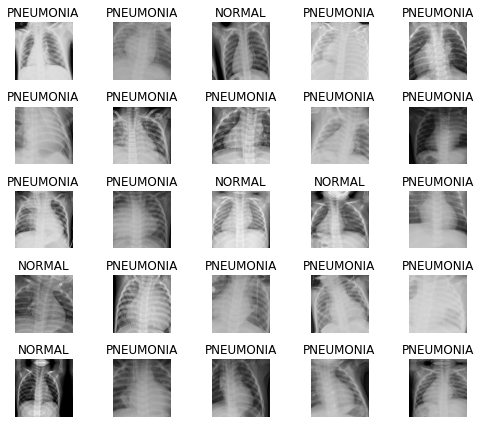

In [8]:
data.show_batch(rows=5, figsize=(7,6))

Now, we start the training using Convolutional Neural Network backbone

Here we are using the Resnet 50 model

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.073127,0.064665,0.978967,03:16
1,0.094066,0.089278,0.969407,03:16
2,0.082803,0.063262,0.980880,03:16
3,0.074301,0.080735,0.972275,03:15


In [15]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [16]:
os.makedirs("/content/drive/My Drive/dl_projects/chest_xray",exist_ok=True)

In [17]:
path="/content/drive/My Drive/dl_projects/chest_xray"

In [18]:
learn.save(path+"/Stage-1")

In [19]:
learn.export(path+"/export.pkl")